# Segunda lista de exercícios

Alberto Romanhol Moreira - 2017051564

Aplicação de conceitos de Redes Neurais Artificiais.

#### 1 - Classificação de padrões

Classificação de amostras de duas classe. Aplicando as arquiteturas de rede e comparando valores de acurácia e número de neurônios na camada escondida.

- Perceptron Simples
- ELM
- Perceptron de múltiplas camadas

De início, são feio os importes e definição de função a serem utilizadas para o Perceptron, ELM e perceptron de múltiplas camadas, iguais para a Distribuição Normal, XOR e Sprials.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

#### PERCEPTRON

In [2]:
def trainPerceptron(x,y,eta,tol,max_epocas,par):
    if par == 1:
        bias = np.ones((x.shape[0],1))
        x = np.concatenate((x,bias), axis = 1)
        
    N_perceptron = x.shape[0]
    n_perceptron = x.shape[1]
    w = np.random.rand(n_perceptron) - 0.5 
    w = np.resize(w,(w.shape[0],1))
    n_epocas = 0
    erro_epoca = 1 + tol
    evec = erro_epoca * np.ones(max_epocas)
    
    while erro_epoca > tol and n_epocas < max_epocas - 1:
        e_i2 = 0
        xseq = np.arange(N_perceptron)
        np.random.shuffle(xseq)
        
        for i in range(N_perceptron):
            i_rand = xseq[i]
            yhat_i = np.multiply(np.dot(x[i_rand],w) >= 0, 1)
            e_i = y[i_rand] - yhat_i
            dw = eta * e_i * x[i_rand]
            dw = np.resize(dw,(dw.shape[0],1))
            w = w + dw
            e_i2 = e_i2 + e_i * e_i
        
        n_epocas += 1
        evec[n_epocas] = e_i2/N_perceptron
        erro_epoca = evec[n_epocas]
        
    return w, evec[0:n_epocas]

def yPerceptron(x, w, par):
    if par == 0:
        x = np.concatenate((x,np.ones((x.shape[0],1))), axis = 1)

    w = np.resize(w, (x.shape[1],1))
    y_eval = np.dot(x,w)
    class_eval = np.squeeze(np.multiply(np.dot(x,w) >= 0, 1))
    
    return y_eval, class_eval

#### ELM

In [3]:
def trainELMPseudoInverse(x, y, p, max_epocas):
    n = np.shape(x)[1]
    z = np.random.rand(n, p) - 0.5
    z = np.resize(z, (z.shape[0], z.shape[1]))

    for _ in range(max_epocas):
        h = np.tanh(np.dot(x, z))
        w = np.dot(np.linalg.pinv(h), y)

    return z,w

def yELM(z, w, test):
    w = np.resize(w, (w.shape[0], 1))
    classified_H = np.tanh(np.dot(test, z))
    classified = np.sign(np.tanh(np.dot(classified_H, w)))
    return classified
    
def errorCalcELM(yEval, actualClass):
    error = np.absolute(actualClass - yEval)
    meanError = np.mean(error)
    stdError = np.std(error)
    accuracy = 1 - meanError
    errorTest = (yEval - actualClass)**2
    errorTest_MS = np.mean(errorTest)

    return accuracy, stdError, errorTest_MS

#### PERCEPTRON MULTIPLA CAMADA (MLP)

In [4]:
def activation_y(u):
    return np.tanh(u)

def derivActivation_y(u):
    return (((2/(np.exp(u) + np.exp(-u)))*(2/(np.exp(u) + np.exp(-u)))))

def derivActivation_h(u):
    return (((2/(np.exp(u) + np.exp(-u)))*(2/(np.exp(u) + np.exp(-u)))))

def activation_h(u):
    return np.tanh(u)

def trainMLP(x, y, p, eta, tol, maxEpocas):
    m = y.shape[1]
    n = np.shape(x)[1]
    N = np.shape(x)[0]
    z = np.matrix(np.random.rand(n+1,p)-0.5)
    w = np.matrix(np.random.rand(p+1,m)-0.5)
    
    xAtual = np.zeros((1, n+1))
    nEpocas = 0
    erroEpoca = tol+1
    evec = [[0]]

    while erroEpoca > tol and nEpocas < maxEpocas - 1:
        ei2 = 0
        xseq = np.arange(N)

        for i in range(N):
            irand = xseq[i]
            xAtual[0,:-1] = x[irand]
            xAtual[0,-1] = 1
            yAtual = y[irand]

            U = np.array(np.dot(xAtual,z), ndmin = 2)
            h_i = activation_h(U)
            hBias = np.append(h_i,[[1]],axis=1)

            yhat_i = np.array(np.dot(hBias, w), ndmin=2)
            yhatClass_i = activation_y(yhat_i)

            e_i = yAtual - yhatClass_i
            flinhaO = derivActivation_y(yhat_i)
            dO= e_i*flinhaO

            wMinus = w[:-1, :]
            eHidden = np.dot(dO, wMinus.T)
            flinhaU = derivActivation_h(U)
            dU = np.multiply(eHidden, flinhaU)

            w = w +eta*np.dot(hBias.T, dO)
            z = z +eta*np.dot(xAtual.T, dU)
            ei2 = ei2 + np.dot(e_i, e_i.T)

        if nEpocas == 0: evec[0] = np.squeeze(ei2/N)
        nEpocas += 1
        evec = np.append(evec, np.squeeze(ei2/N))
        erroEpoca = evec[nEpocas]

    return w, z, evec

def yMLP(x, z, w):
  x = np.append(x, np.ones((x.shape[0],1)), axis = 1)
  h_hat = activation_h(np.dot(x,z))
  h_bias = np.append(h_hat, np.ones((h_hat.shape[0], 1)), axis = 1)
  output = np.dot(h_bias, w)
  yEval = activation_y(output)
  
  return yEval

def errorCalcMLP(yEval, actualClass):
  error = np.multiply(actualClass != yEval, 1)
  meanError = np.mean(error)
  stdError = np.std(error)
  accuracy = 1 - meanError
  errorTest = np.dot(error, error.T)
  errorTest_MS = np.mean(errorTest)

  return accuracy, stdError, errorTest_MS

##### 1.1 - Distribuição de normais

Inicialmente define-se os input de dados para a distribuição normal.

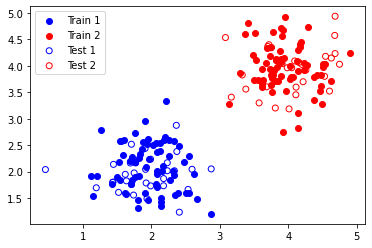

In [5]:
N = 100

# 70% for train and 30% for test
trainSize = int(0.7*N)
testSize = N - trainSize

sigma_1 = 0.4**2
sigma_2 = 0.4**2

mu_1 = 2
mu_2 = 4

mean_1 = [mu_1, mu_1]
mean_2 = [mu_2, mu_2]

cov_1 = [[sigma_1, 0], [0, sigma_1]]
cov_2 = [[sigma_2, 0], [0, sigma_2]]

# data train
x1_train, y1_train = np.random.multivariate_normal(mean_1, cov_1, trainSize).T
x2_train, y2_train = np.random.multivariate_normal(mean_2, cov_2, trainSize).T

x1_train = np.resize(x1_train, (trainSize, 1))
y1_train = np.resize(y1_train, (trainSize, 1))

x2_train = np.resize(x2_train, (trainSize, 1))
y2_train = np.resize(y2_train, (trainSize, 1))

# data test
x1_test, y1_test = np.random.multivariate_normal(mean_1, cov_1, testSize).T
x2_test, y2_test = np.random.multivariate_normal(mean_2, cov_2, testSize).T

x1_test = np.resize(x1_test, (testSize, 1))
y1_test = np.resize(y1_test, (testSize, 1))

x2_test = np.resize(x2_test, (testSize, 1))
y2_test = np.resize(y2_test, (testSize, 1))

# PLOT
plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.legend(['Train 1', 'Train 2', 'Test 1', 'Test 2'])
plt.show()

1. Perceptron
   
São definido as classes de treino. 

In [6]:
# class train
class_train_1 = 0*np.ones((x1_train.shape[0], 1))
class_train_2 = np.ones((x2_train.shape[0], 1))

class_train = np.concatenate((class_train_1, class_train_2), axis = 0)

# trains
xin_train_1 = np.concatenate((x1_train, y1_train), axis = 1)
xin_train_2 = np.concatenate((x2_train, y2_train), axis = 1)
xin_train_1_2 = np.concatenate((xin_train_1, xin_train_2), axis = 0)

É feito o treino do Perceptron. Na Figura, encontra-se a curva de erro médio do modelo.

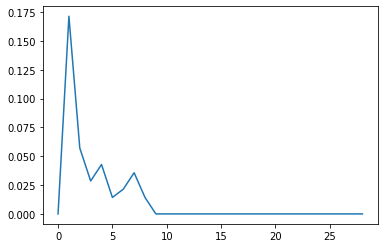

In [7]:

eta = 0.01
tol = -1
max_epocas = 30
consider_bias = 1
wt, evec = trainPerceptron(xin_train_1_2, class_train, eta, tol, max_epocas, consider_bias)

plt.plot(evec)
plt.show()

Exibição de resultados, com os dados de treino e teste e a curva de separação entre eles.

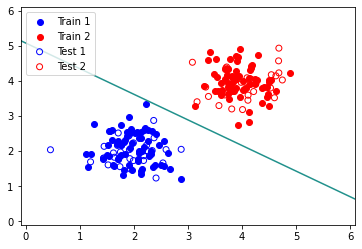

In [8]:
# matrix de pontos xy
xgrid = np.linspace(-0.1, 6.1, 250)
ygrid = np.linspace(-0.1, 6.1, 250)
xygrid = np.zeros((xgrid.shape[0]*ygrid.shape[0], 2))
xMeshGrid, yMeshGrid = np.meshgrid(xgrid, ygrid)

classMeshgrid = np.zeros((xgrid.shape[0], ygrid.shape[0]))

for i, i_pt in enumerate(xgrid):
  for j, j_pt in enumerate(ygrid):
    yd, xyClass = yPerceptron(np.array([j_pt, i_pt], ndmin = 2), wt, 0)
    classMeshgrid[i, j] = yd

###
plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.legend(['Train 1', 'Train 2', 'Test 1', 'Test 2'])
plt.contour(xMeshGrid, yMeshGrid, classMeshgrid, levels = 0)
plt.show()

2. ELM

As entradas são as mesmas definidas para o perceptron, bem como as classes de treino e entrada. São definido as classes de testes.

In [9]:
bias = np.ones((xin_train_1_2.shape[0], 1))
xin = np.concatenate((xin_train_1_2, bias), axis = 1)

# test
class_test_1 = -1*np.ones((x1_test.shape[0], 1))
class_test_2 = np.ones((x2_test.shape[0], 1))
class_test = np.concatenate((class_test_1, class_test_2))

xin_test_1 = np.concatenate((x1_test, y1_test), axis = 1)
xin_test_2 = np.concatenate((x2_test, y2_test), axis = 1)

test_range = np.concatenate((xin_test_1, xin_test_2), axis = 0)
test_range = np.concatenate((test_range, np.ones((test_range.shape[0], 1))), axis = 1)

Então, é feito o treino para o ELM, bem como calculado o erro para cada uma das epocas

In [10]:
maxEpocas = 30
p = 12

accuracy_train = []
accuracy_ref = 0

# epoca erro calc
for i in range(maxEpocas):
  np.random.seed(i)
  aux = list(zip(xin, class_train))
  np.random.shuffle(aux)
  xin, class_train = zip(*aux)

  z, wt = trainELMPseudoInverse(xin, class_train, p, maxEpocas)

  classified_H = np.tanh(np.dot(test_range, z))
  classified = np.sign(np.tanh(np.dot(classified_H, wt)))

  accuracy, stdError, errorMS = errorCalcELM(classified, class_test)
  
  if (accuracy > accuracy_ref):
    accuracy_ref = accuracy
    std_ref = stdError
    erroMS_ref = errorMS
    classified_ref = classified
    wt_ref = wt
    z_ref = z

  accuracy_train.append(accuracy)

É realizado a exibição de resultados, com a curva de separação

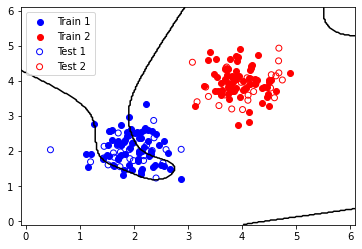

In [11]:

# matrix de pontos xy
xgrid = np.linspace(-0.1, 6.1, 250)
ygrid = np.linspace(-0.1, 6.1, 250)
xygrid = np.zeros((xgrid.shape[0]*ygrid.shape[0], 2))
xMeshGrid, yMeshGrid = np.meshgrid(xgrid, ygrid)

classMeshgrid = np.zeros((xgrid.shape[0], ygrid.shape[0]))

for i, i_pt in enumerate(xgrid):
  for j, j_pt in enumerate(ygrid):
    H = np.tanh(np.dot([j_pt, i_pt, 1], z_ref))
    xyClass = np.sign(np.tanh(np.dot(H, wt_ref)))
    classMeshgrid[i, j] = xyClass

plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.legend(['Train 1', 'Train 2', 'Test 1', 'Test 2'])
plt.contour(xMeshGrid, yMeshGrid, classMeshgrid, colors=['k'], levels = 0)
plt.show()


É feita o calculo e exibição tanto do erro quadrado quanto da acurácia do modelo.

Erro quadrado:     0.6667
Accuracy:     0.6667
Std Error:     0.7454


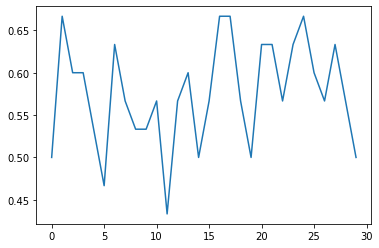

In [12]:

classified_H = np.tanh(np.dot(test_range, z_ref))
classified = np.sign(np.tanh(np.dot(classified_H, wt_ref)))

accuracy, stdError, errorMS = errorCalcELM(classified, class_test)
errorTest = (classified - class_test)**2
errorTest_MS = np.mean(errorTest)

print('Erro quadrado: {:10.4f}'.format(errorTest_MS))
print('Accuracy: {:10.4f}'.format(accuracy_ref))
print('Std Error: {:10.4f}'.format(stdError))

plt.plot(accuracy_train)

3. Perceptron de múltiplas camadas

Para o perceptron de múltiplas camadas, os dados de entrada já foram definidos anteriormente, define-se as classes de treino e teste.

In [13]:
xin_train_1 = np.concatenate((x1_train, y1_train), axis = 1)
xin_train_2 = np.concatenate((x2_train, y2_train), axis = 1)
xin_train_1_2 = np.concatenate((xin_train_1, xin_train_2), axis = 0)
xin_train = np.array(xin_train_1_2)

actual_test = np.concatenate((-1*np.ones((testSize, 1)), np.ones((testSize, 1))))
test_1 = np.concatenate((x1_test, y1_test), axis = 1)
test_2 = np.concatenate((x2_test, y2_test), axis = 1)
test_range = np.concatenate((test_1, test_2), axis = 0)

class_train_1 = -1*np.ones((x1_train.shape[0], 1))
class_train_2 = np.ones((x2_train.shape[0], 1))
class_train = np.concatenate((class_train_1, class_train_2), axis = 0)

Treina-se então o modelo e plota o erro por epoca deste. Tem-se ainda a acurácia para o modelo.

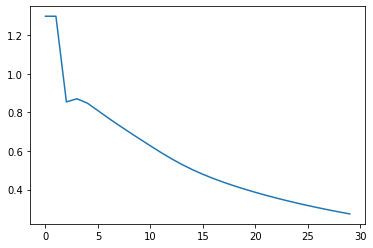

   Acurácia  Desvio Padrão  Erro Médio Quadrático
0  0.983333       0.128019               0.000278


In [14]:
eta = 0.001
max_epocas = 30
p_in = 12
tol = 1e-6

x_train = xin_train
y_train = class_train

wt, zt, erroEpocas = trainMLP(x_train, y_train, p_in, eta, tol, max_epocas)

plt.plot(erroEpocas)
plt.show()

test_set = np.array(test_range)
yEval = np.sign(np.squeeze(yMLP(test_set, zt, wt))).T
scores = errorCalcMLP(yEval, actual_test)
scores = pd.DataFrame(np.array(scores, ndmin = 2), columns = ['Acurácia', 'Desvio Padrão', 'Erro Médio Quadrático'])
print(scores)

É feito então a exibição dos resultados, com a curva de separação.

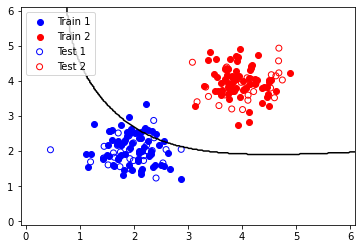

In [15]:
# matrix de pontos xy
xgrid = np.linspace(-0.1, 6.1, 250)
ygrid = np.linspace(-0.1, 6.1, 250)
xygrid = np.zeros((xgrid.shape[0]*ygrid.shape[0], 2))
xMeshGrid, yMeshGrid = np.meshgrid(xgrid, ygrid)
classMeshgrid = np.zeros((xgrid.shape[0], ygrid.shape[0]))

for i, i_pt in enumerate(xgrid):
    for j, j_pt in enumerate(ygrid):
        H = activation_h(np.dot(np.array([j_pt, i_pt, 1]), zt))
        H_bias = np.append(H, [[1]], axis = 1)
        xyClass = np.sign(activation_y(np.dot(H_bias, wt)))
        classMeshgrid[i, j] = xyClass

###
plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.legend(['Train 1', 'Train 2', 'Test 1', 'Test 2'])
plt.contour(xMeshGrid, yMeshGrid, classMeshgrid, colors=['k'], levels = 0)
plt.show()

##### 1.2 - XOR

Define-se os dados de entrada, a partir de um arquivo .csv fornecido. É então feito um mistura nos dados, para ter um aleatoriedade neles.

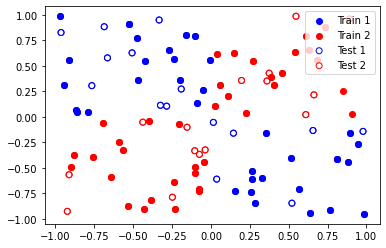

In [16]:
dataFrame = pd.read_csv('data/xor.csv')
dataFrame = shuffle(dataFrame)

N = len(dataFrame)

# 70% for train and 30% for test
trainSize = int(0.7*N)
testSize = N - trainSize

trainData = dataFrame.head(trainSize)
testDate = dataFrame.tail(testSize)

# data train
x1_train = trainData[trainData['classes'] == 1]['x.1'].to_numpy()
x1_train = np.resize(x1_train, (trainSize, 1))
y1_train = trainData[trainData['classes'] == 1]['x.2'].to_numpy()
y1_train = np.resize(y1_train, (trainSize, 1))

x2_train = trainData[trainData['classes'] == 2]['x.1'].to_numpy()
x2_train = np.resize(x2_train, (trainSize, 1))
y2_train = trainData[trainData['classes'] == 2]['x.2'].to_numpy()
y2_train = np.resize(y2_train, (trainSize, 1))

# data test
x1_test = testDate[testDate['classes'] == 1]['x.1'].to_numpy()
x1_test = np.resize(x1_test, (testSize, 1))
y1_test = testDate[testDate['classes'] == 1]['x.2'].to_numpy()
y1_test = np.resize(y1_test, (testSize, 1))

x2_test = testDate[testDate['classes'] == 2]['x.1'].to_numpy()
x2_test = np.resize(x2_test, (testSize, 1))
y2_test = testDate[testDate['classes'] == 2]['x.2'].to_numpy()
y2_test = np.resize(y2_test, (testSize, 1))

# PLOT
plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.legend(['Train 1', 'Train 2', 'Test 1', 'Test 2'])
plt.show()

São definidos as classes de treino.

In [17]:
# class train
class_train_1 = 0*np.ones((x1_train.shape[0], 1))
class_train_2 = np.ones((x2_train.shape[0], 1))

class_train = np.concatenate((class_train_1, class_train_2), axis = 0)

# trains
xin_train_1 = np.concatenate((x1_train, y1_train), axis = 1)
xin_train_2 = np.concatenate((x2_train, y2_train), axis = 1)
xin_train_1_2 = np.concatenate((xin_train_1, xin_train_2), axis = 0)

É feito o treino do Perceptron. Na Figura, encontra-se a curva de erro médio do modelo.

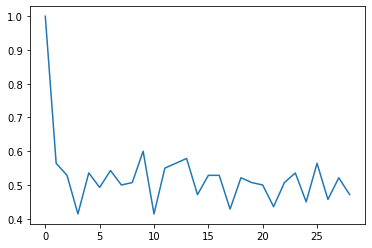

In [18]:
eta = 0.01
tol = 1e-6
max_epocas = 30
consider_bias = 1
wt, evec = trainPerceptron(xin_train_1_2, class_train, eta, tol, max_epocas, consider_bias)

plt.plot(evec)
plt.show()

Exibição de resultados, com os dados de treino e teste e a curva de separação entre eles.

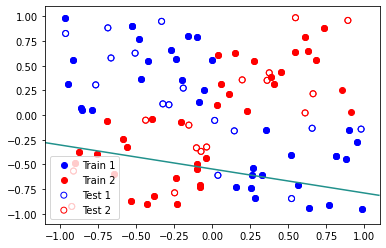

In [19]:
# matrix de pontos xy
xgrid = np.linspace(-1.1, 1.1, 250)
ygrid = np.linspace(-1.1, 1.1, 250)
xygrid = np.zeros((xgrid.shape[0]*ygrid.shape[0], 2))
xMeshGrid, yMeshGrid = np.meshgrid(xgrid, ygrid)

classMeshgrid = np.zeros((xgrid.shape[0], ygrid.shape[0]))

for i, i_pt in enumerate(xgrid):
  for j, j_pt in enumerate(ygrid):
    yd, xyClass = yPerceptron(np.array([j_pt, i_pt], ndmin = 2), wt, 0)
    classMeshgrid[i, j] = yd

###
plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.legend(['Train 1', 'Train 2', 'Test 1', 'Test 2'])
plt.contour(xMeshGrid, yMeshGrid, classMeshgrid, levels = 0)
plt.show()

2. ELM
   

As entradas são as mesmas definidas para o perceptron, bem como as classes de treino e entrada. São definido as classes de testes.

In [20]:

bias = np.ones((xin_train_1_2.shape[0], 1))
xin = np.concatenate((xin_train_1_2, bias), axis = 1)

# test
class_test_1 = -1*np.ones((x1_test.shape[0], 1))
class_test_2 = np.ones((x2_test.shape[0], 1))
class_test = np.concatenate((class_test_1, class_test_2))

xin_test_1 = np.concatenate((x1_test, y1_test), axis = 1)
xin_test_2 = np.concatenate((x2_test, y2_test), axis = 1)

test_range = np.concatenate((xin_test_1, xin_test_2), axis = 0)
test_range = np.concatenate((test_range, np.ones((test_range.shape[0], 1))), axis = 1)

Então, é feito o treino para o ELM, bem como calculado o erro para cada uma das epocas

In [21]:
maxEpocas = 30
p = 20

accuracy_train = []
accuracy_ref = 0

# epoca erro calc
for i in range(maxEpocas):
  np.random.seed(i)
  aux = list(zip(xin, class_train))
  np.random.shuffle(aux)
  xin, class_train = zip(*aux)

  z, wt = trainELMPseudoInverse(xin, class_train, p, maxEpocas)

  classified_H = np.tanh(np.dot(test_range, z))
  classified = np.sign(np.tanh(np.dot(classified_H, wt)))

  accuracy, stdError, errorMS = errorCalcELM(classified, class_test)
  
  if (accuracy > accuracy_ref):
    accuracy_ref = accuracy
    std_ref = stdError
    erroMS_ref = errorMS
    classified_ref = classified
    wt_ref = wt
    z_ref = z

  accuracy_train.append(accuracy)

É realizado a exibição de resultados, com a curva de separação

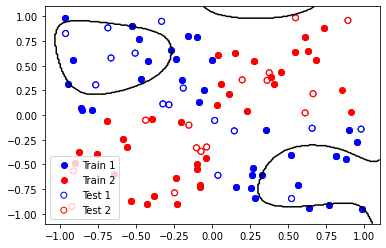

In [22]:

# matrix de pontos xy
xgrid = np.linspace(-1.1, 1.1, 250)
ygrid = np.linspace(-1.1, 1.1, 250)
xygrid = np.zeros((xgrid.shape[0]*ygrid.shape[0], 2))
xMeshGrid, yMeshGrid = np.meshgrid(xgrid, ygrid)

classMeshgrid = np.zeros((xgrid.shape[0], ygrid.shape[0]))

for i, i_pt in enumerate(xgrid):
  for j, j_pt in enumerate(ygrid):
    H = np.tanh(np.dot([j_pt, i_pt, 1], z_ref))
    xyClass = np.sign(np.tanh(np.dot(H, wt_ref)))
    classMeshgrid[i, j] = xyClass

plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.legend(['Train 1', 'Train 2', 'Test 1', 'Test 2'])
plt.contour(xMeshGrid, yMeshGrid, classMeshgrid, colors=['k'], levels = 0)
plt.show()

É feita o calculo e exibição tanto do erro quadrado quanto da acurácia do modelo.

Erro quadrado:     1.2000
Accuracy:     0.4000
Std Error:     0.9165


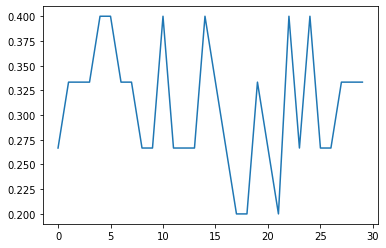

In [23]:
classified_H = np.tanh(np.dot(test_range, z_ref))
classified = np.sign(np.tanh(np.dot(classified_H, wt_ref)))

accuracy, stdError, errorMS = errorCalcELM(classified, class_test)
errorTest = (classified - class_test)**2
errorTest_MS = np.mean(errorTest)

print('Erro quadrado: {:10.4f}'.format(errorTest_MS))
print('Accuracy: {:10.4f}'.format(accuracy_ref))
print('Std Error: {:10.4f}'.format(stdError))

plt.plot(accuracy_train)
plt.show()

3. Perceptron de múltiplas camadas

Para o perceptron de múltiplas camadas, os dados de entrada já foram definidos anteriormente, define-se as classes de treino e teste.

In [24]:
xin_train_1 = np.concatenate((x1_train, y1_train), axis = 1)
xin_train_2 = np.concatenate((x2_train, y2_train), axis = 1)
xin_train_1_2 = np.concatenate((xin_train_1, xin_train_2), axis = 0)
xin_train = np.array(xin_train_1_2)

###
actual_test = np.concatenate((-1*np.ones((testSize, 1)), np.ones((testSize, 1))))
test_1 = np.concatenate((x1_test, y1_test), axis = 1)
test_2 = np.concatenate((x2_test, y2_test), axis = 1)
test_range = np.concatenate((test_1, test_2), axis = 0)

###
class_train_1 = -1*np.ones((x1_train.shape[0], 1))
class_train_2 = np.ones((x2_train.shape[0], 1))
class_train = np.concatenate((class_train_1, class_train_2), axis = 0)

Treina-se então o modelo e plota o erro por epoca deste. Tem-se ainda a acurácia para o modelo.

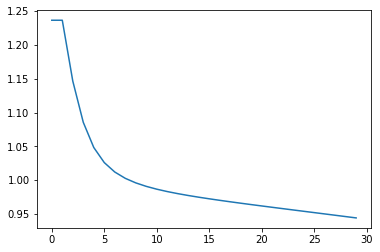

   Acurácia  Desvio Padrão  Erro Médio Quadrático
0       0.5            0.5                   0.25


In [25]:
eta = 0.001
max_epocas = 30
p_in = 20
tol = 1e-6

x_train = xin_train
y_train = class_train

wt, zt, erroEpocas = trainMLP(x_train, y_train, p_in, eta, tol, max_epocas)

plt.plot(erroEpocas)
plt.show()

test_set = np.array(test_range)
yEval = np.sign(np.squeeze(yMLP(test_set, zt, wt))).T
scores = errorCalcMLP(yEval, actual_test)
scores = pd.DataFrame(np.array(scores, ndmin = 2), columns = ['Acurácia', 'Desvio Padrão', 'Erro Médio Quadrático'])
print(scores)

É feito então a exibição dos resultados, com a curva de separação.

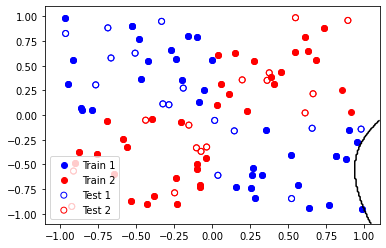

In [26]:
# matrix de pontos xy
xgrid = np.linspace(-1.1, 1.1, 250)
ygrid = np.linspace(-1.1, 1.1, 250)
xygrid = np.zeros((xgrid.shape[0]*ygrid.shape[0], 2))
xMeshGrid, yMeshGrid = np.meshgrid(xgrid, ygrid)
classMeshgrid = np.zeros((xgrid.shape[0], ygrid.shape[0]))

for i, i_pt in enumerate(xgrid):
    for j, j_pt in enumerate(ygrid):
        H = activation_h(np.dot(np.array([j_pt, i_pt, 1]), zt))
        H_bias = np.append(H, [[1]], axis = 1)
        xyClass = np.sign(activation_y(np.dot(H_bias, wt)))
        classMeshgrid[i, j] = xyClass

###
plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.legend(['Train 1', 'Train 2', 'Test 1', 'Test 2'])
plt.contour(xMeshGrid, yMeshGrid, classMeshgrid, colors=['k'], levels = 0)
plt.show()

##### 1.3 - Spirals

Define-se os dados de entrada, a partir de um arquivo .csv fornecido. É então feito um mistura nos dados, para ter um aleatoriedade neles.

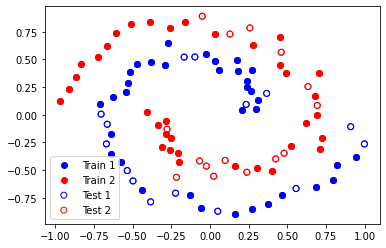

In [27]:
dataFrame = pd.read_csv('data/spirals.csv')
dataFrame = shuffle(dataFrame)

N = len(dataFrame)

# 70% for train and 30% for test
trainSize = int(0.7*N)
testSize = N - trainSize

trainData = dataFrame.head(trainSize)
testDate = dataFrame.tail(testSize)

# data train
x1_train = trainData[trainData['classes'] == 1]['x.1'].to_numpy()
x1_train = np.resize(x1_train, (trainSize, 1))
y1_train = trainData[trainData['classes'] == 1]['x.2'].to_numpy()
y1_train = np.resize(y1_train, (trainSize, 1))

x2_train = trainData[trainData['classes'] == 2]['x.1'].to_numpy()
x2_train = np.resize(x2_train, (trainSize, 1))
y2_train = trainData[trainData['classes'] == 2]['x.2'].to_numpy()
y2_train = np.resize(y2_train, (trainSize, 1))

# data test
x1_test = testDate[testDate['classes'] == 1]['x.1'].to_numpy()
x1_test = np.resize(x1_test, (testSize, 1))
y1_test = testDate[testDate['classes'] == 1]['x.2'].to_numpy()
y1_test = np.resize(y1_test, (testSize, 1))

x2_test = testDate[testDate['classes'] == 2]['x.1'].to_numpy()
x2_test = np.resize(x2_test, (testSize, 1))
y2_test = testDate[testDate['classes'] == 2]['x.2'].to_numpy()
y2_test = np.resize(y2_test, (testSize, 1))

# PLOT
plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.legend(['Train 1', 'Train 2', 'Test 1', 'Test 2'])
plt.show()


1. Perceptron Simples

São definidos as classes de treino.

In [28]:
# class train
class_train_1 = 0*np.ones((x1_train.shape[0], 1))
class_train_2 = np.ones((x2_train.shape[0], 1))

class_train = np.concatenate((class_train_1, class_train_2), axis = 0)

# trains
xin_train_1 = np.concatenate((x1_train, y1_train), axis = 1)
xin_train_2 = np.concatenate((x2_train, y2_train), axis = 1)
xin_train_1_2 = np.concatenate((xin_train_1, xin_train_2), axis = 0)

É feito o treino do Perceptron. Na Figura, encontra-se a curva de erro médio do modelo.

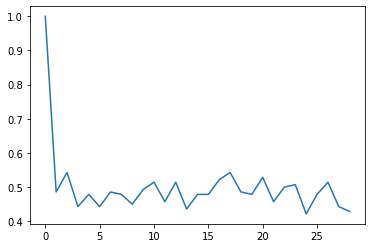

In [29]:
eta = 0.01
tol = 1e-6
max_epocas = 30
consider_bias = 1
wt, evec = trainPerceptron(xin_train_1_2, class_train, eta, tol, max_epocas, consider_bias)

plt.plot(evec)
plt.show()

Exibição de resultados, com os dados de treino e teste e a curva de separação entre eles.

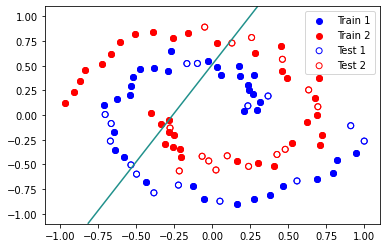

In [30]:
# matrix de pontos xy
xgrid = np.linspace(-1.1, 1.1, 250)
ygrid = np.linspace(-1.1, 1.1, 250)
xygrid = np.zeros((xgrid.shape[0]*ygrid.shape[0], 2))
xMeshGrid, yMeshGrid = np.meshgrid(xgrid, ygrid)

classMeshgrid = np.zeros((xgrid.shape[0], ygrid.shape[0]))

for i, i_pt in enumerate(xgrid):
  for j, j_pt in enumerate(ygrid):
    yd, xyClass = yPerceptron(np.array([j_pt, i_pt], ndmin = 2), wt, 0)
    classMeshgrid[i, j] = yd

###
plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.legend(['Train 1', 'Train 2', 'Test 1', 'Test 2'])
plt.contour(xMeshGrid, yMeshGrid, classMeshgrid, levels = 0)
plt.show()

2. ELM
   

As entradas são as mesmas definidas para o perceptron, bem como as classes de treino e entrada. São definido as classes de testes.

In [31]:

bias = np.ones((xin_train_1_2.shape[0], 1))
xin = np.concatenate((xin_train_1_2, bias), axis = 1)

# test
class_test_1 = -1*np.ones((x1_test.shape[0], 1))
class_test_2 = np.ones((x2_test.shape[0], 1))
class_test = np.concatenate((class_test_1, class_test_2))

xin_test_1 = np.concatenate((x1_test, y1_test), axis = 1)
xin_test_2 = np.concatenate((x2_test, y2_test), axis = 1)

test_range = np.concatenate((xin_test_1, xin_test_2), axis = 0)
test_range = np.concatenate((test_range, np.ones((test_range.shape[0], 1))), axis = 1)

Então, é feito o treino para o ELM, bem como calculado o erro para cada uma das epocas

In [32]:
maxEpocas = 30
p = 22

accuracy_train = []
accuracy_ref = 0

# epoca erro calc
for i in range(maxEpocas):
  np.random.seed(i)
  aux = list(zip(xin, class_train))
  np.random.shuffle(aux)
  xin, class_train = zip(*aux)

  z, wt = trainELMPseudoInverse(xin, class_train, p, maxEpocas)

  classified_H = np.tanh(np.dot(test_range, z))
  classified = np.sign(np.tanh(np.dot(classified_H, wt)))

  accuracy, stdError, errorMS = errorCalcELM(classified, class_test)
  
  if (accuracy > accuracy_ref):
    accuracy_ref = accuracy
    std_ref = stdError
    erroMS_ref = errorMS
    classified_ref = classified
    wt_ref = wt
    z_ref = z

  accuracy_train.append(accuracy)

É realizado a exibição de resultados, com a curva de separação

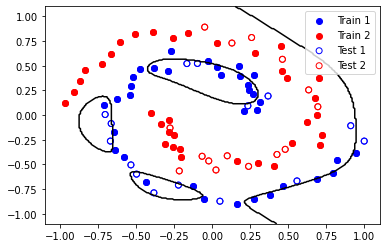

In [33]:

# matrix de pontos xy
xgrid = np.linspace(-1.1, 1.1, 250)
ygrid = np.linspace(-1.1, 1.1, 250)
xygrid = np.zeros((xgrid.shape[0]*ygrid.shape[0], 2))
xMeshGrid, yMeshGrid = np.meshgrid(xgrid, ygrid)

classMeshgrid = np.zeros((xgrid.shape[0], ygrid.shape[0]))

for i, i_pt in enumerate(xgrid):
  for j, j_pt in enumerate(ygrid):
    H = np.tanh(np.dot([j_pt, i_pt, 1], z_ref))
    xyClass = np.sign(np.tanh(np.dot(H, wt_ref)))
    classMeshgrid[i, j] = xyClass

plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.legend(['Train 1', 'Train 2', 'Test 1', 'Test 2'])
plt.contour(xMeshGrid, yMeshGrid, classMeshgrid, colors=['k'], levels = 0)
plt.show()

É feita o calculo e exibição tanto do erro quadrado quanto da acurácia do modelo.

Erro quadrado:     0.8000
Accuracy:     0.6000
Std Error:     0.8000


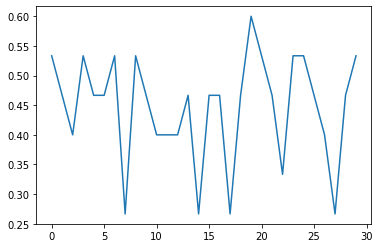

In [34]:
classified_H = np.tanh(np.dot(test_range, z_ref))
classified = np.sign(np.tanh(np.dot(classified_H, wt_ref)))

accuracy, stdError, errorMS = errorCalcELM(classified, class_test)
errorTest = (classified - class_test)**2
errorTest_MS = np.mean(errorTest)

print('Erro quadrado: {:10.4f}'.format(errorTest_MS))
print('Accuracy: {:10.4f}'.format(accuracy_ref))
print('Std Error: {:10.4f}'.format(stdError))

plt.plot(accuracy_train)
plt.show()

3. Perceptron de múltiplas camadas

Para o perceptron de múltiplas camadas, os dados de entrada já foram definidos anteriormente, define-se as classes de treino e teste.

In [35]:
xin_train_1 = np.concatenate((x1_train, y1_train), axis = 1)
xin_train_2 = np.concatenate((x2_train, y2_train), axis = 1)
xin_train_1_2 = np.concatenate((xin_train_1, xin_train_2), axis = 0)
xin_train = np.array(xin_train_1_2)

###
actual_test = np.concatenate((-1*np.ones((testSize, 1)), np.ones((testSize, 1))))
test_1 = np.concatenate((x1_test, y1_test), axis = 1)
test_2 = np.concatenate((x2_test, y2_test), axis = 1)
test_range = np.concatenate((test_1, test_2), axis = 0)

###
class_train_1 = -1*np.ones((x1_train.shape[0], 1))
class_train_2 = np.ones((x2_train.shape[0], 1))
class_train = np.concatenate((class_train_1, class_train_2), axis = 0)

Treina-se então o modelo e plota o erro por epoca deste. Tem-se ainda a acurácia para o modelo.

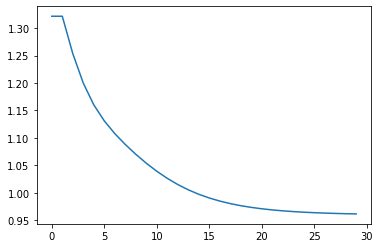

   Acurácia  Desvio Padrão  Erro Médio Quadrático
0  0.433333       0.495536               0.321111


In [36]:
eta = 0.001
max_epocas = 30
p_in = 22
tol = 1e-6

x_train = xin_train
y_train = class_train

wt, zt, erroEpocas = trainMLP(x_train, y_train, p_in, eta, tol, max_epocas)

plt.plot(erroEpocas)
plt.show()

test_set = np.array(test_range)
yEval = np.sign(np.squeeze(yMLP(test_set, zt, wt))).T
scores = errorCalcMLP(yEval, actual_test)
scores = pd.DataFrame(np.array(scores, ndmin = 2), columns = ['Acurácia', 'Desvio Padrão', 'Erro Médio Quadrático'])
print(scores)

É feito então a exibição dos resultados, com a curva de separação.

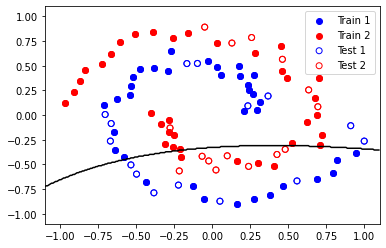

In [37]:
# matrix de pontos xy
xgrid = np.linspace(-1.1, 1.1, 250)
ygrid = np.linspace(-1.1, 1.1, 250)
xygrid = np.zeros((xgrid.shape[0]*ygrid.shape[0], 2))
xMeshGrid, yMeshGrid = np.meshgrid(xgrid, ygrid)
classMeshgrid = np.zeros((xgrid.shape[0], ygrid.shape[0]))

for i, i_pt in enumerate(xgrid):
    for j, j_pt in enumerate(ygrid):
        H = activation_h(np.dot(np.array([j_pt, i_pt, 1]), zt))
        H_bias = np.append(H, [[1]], axis = 1)
        xyClass = np.sign(activation_y(np.dot(H_bias, wt)))
        classMeshgrid[i, j] = xyClass

###
plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.legend(['Train 1', 'Train 2', 'Test 1', 'Test 2'])
plt.contour(xMeshGrid, yMeshGrid, classMeshgrid, colors=['k'], levels = 0)
plt.show()